# ÖDEV1 veya ÖDEV1_EK <--yazılacaktır

### Dokümanın adı ODEV1_OgrenciKOD.ipynb  olmalıdır. 
### EK problemler için dosya adı  ODEV1_EK_OgrenciKOD.ipynb  olmalıdır. 
#### Her iki dosyayı GTUZEM'e ÖDEV-1 bölümüne yükleyeceksiniz. 

#### Toplam 2 adet ipynb uzantılı dosya yüklenecektir. 

### Dosyaları sıkıştırıp yükleMEyiniz, olduğu gibi yükleyiniz. 


## Soru-2

<IPython.core.display.Javascript object>


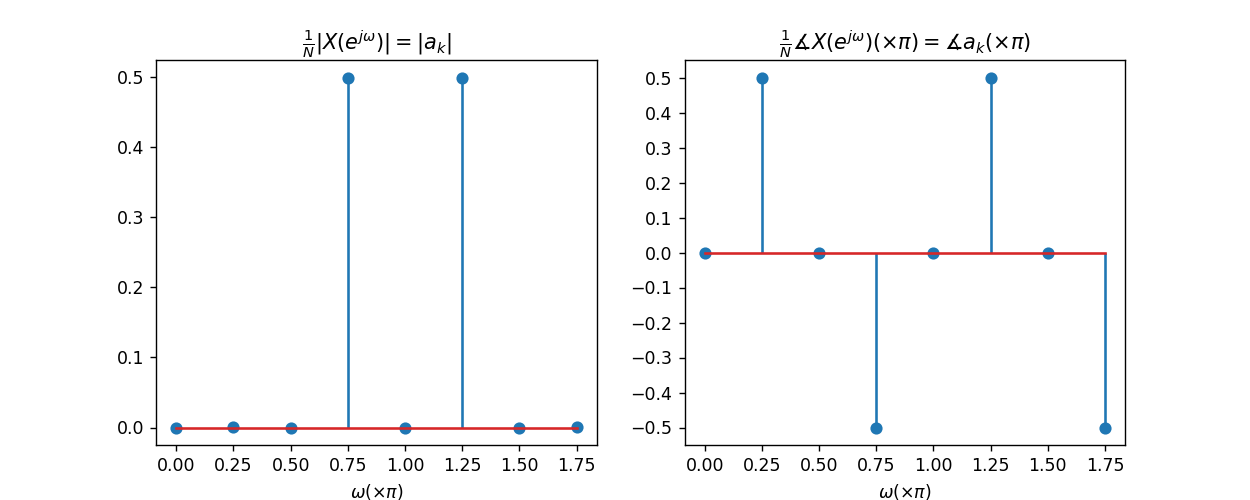

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft , ifft
x = np.array([0, 0.707106, -1, 0.707106, 0, -0.707106, 1, -0.707106])
N=len(x)
n=np.arange(0,8)
w_disc=n*2*np.pi/N
X_abs=np.abs(fft(x)/N)
X_phase=np.angle(fft(x)/N)
fig = plt.figure(figsize = (10,4))
plt.subplot(121)
plt.stem(w_disc/np.pi,X_abs)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}|X(e^{j\omega})|=|a_{k}|$')
plt.subplot(122)
plt.stem(w_disc/np.pi,X_phase/np.pi)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}\measuredangle X(e^{j\omega})(\\times\pi)=\measuredangle a_k(\\times \pi)$')
plt.yticks(np.arange(-0.5, 0.6, 0.1));



Verilen dizi ftt yapıldığında sol taraftaki grafikte genliği, sağ taraftaki grafikte faz görülmektedir.

Genlik grafiğinden sadece üçüncü indisteki 0.5*pi ve beşinci indisteki 0.5*pi frekanslarında DFS katsayılarının sıfırdan farklı değere eşit olduğu görülmektedir. Bu nedenle DFS sentez denklemini kullanarak X[n]'i sentezlemek istersek a3*e^(j*0.5*pi*n) ve a5*e^(j*0.5*pi*n) kompleks üstel işaretlerini toplamamız gerekmektedir.

a3 = |a3| * e^(j*a3), a5 = |a5|*e^(j*a5)

a3 = (1/2) * e^(-j*pi/2), a5 = (1/2) * e^(j*pi/2)


X[n] = $\sum_{n=-sonsuz}^{sonsuz}ak * e^ (j*2*pi*k*n / N) $

     = a3 + a5
     = (1/2) * e^(-j*pi/2) * e^(j*3*pi/4*n) + (1/2) * e^(j*pi/2) * e^(j*5*pi/4*n)
     = (1/2) * e^(n*3*pi/4 - pi/2) + (1/2) - e^(-n*3*pi/4 + pi/2)

bulunur.

Bulunan sonuç düzenlendiğinde cos ifadesi bulunmaktadır ve sonuç aşağıdaki gibidir:
            
            X[n] = cos(3*pi/4*n - pi/2)
            
A = 1 , w0 = 3pi/4 , fi = pi/2 bulunmaktadır.

## Soru-3

<IPython.core.display.Javascript object>


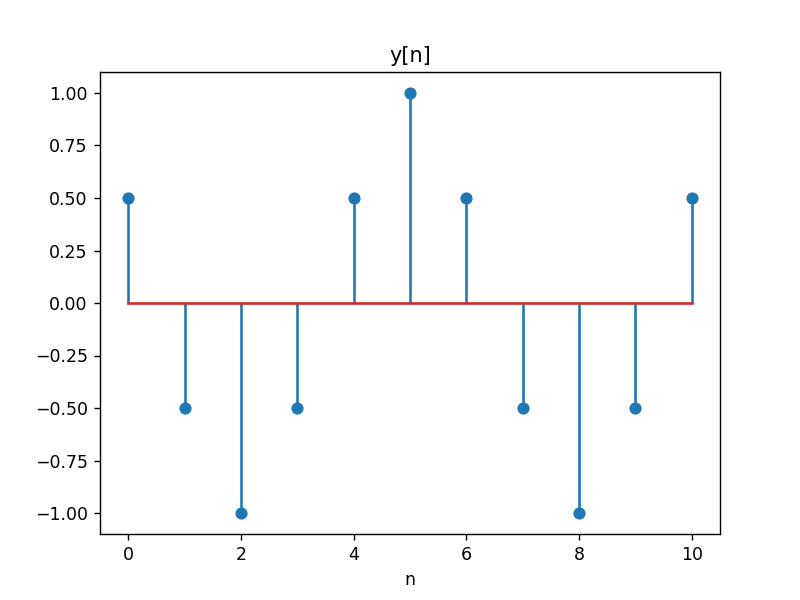

<StemContainer object of 3 artists>

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
%matplotlib notebook
w_cont=np.pi/3
n=np.arange(0,11,1)
H =1j*2*np.exp(1j*(-w_cont/2))*np.sin(w_cont/2)

H_abs=np.abs(H)
H_phase=np.angle(H)

y=H_abs*np.cos(np.pi/3*n+H_phase)

fig = plt.figure()
plt.subplot()
plt.xlabel('n')
plt.title('y[n]')
plt.stem(n,y)

# Ek açıklama

Aşağıda np.convolve fonksiyonu kullanılarak y[n] = $\sum_{n=-sonsuz}^{sonsuz}x[n]*h[n] $ işlemi yapılmıştır ve aynı grafik elde edilmiştir. Yukarıdaki sonuç ile aynıdır cevap doğrudur.

## Convolve ile yazılmış kodlar aşağıdadır

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
%matplotlib notebook

def dirac(n):
    if n == 0:
        return 1;
    else:
        return 0;

w_cont=np.pi/3
n=np.arange(0,12,1)
H = np.array([1,-1])
x = np.cos(np.pi/3*n)

n = np.arange(0,13,1)
y=np.convolve(H,x)

fig = plt.figure()
plt.subplot()
plt.stem(n,y)